In [1]:
from msdtools import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
msd_data = read_msd_data('traj.xyz', [39.08, 41.4506, 50])

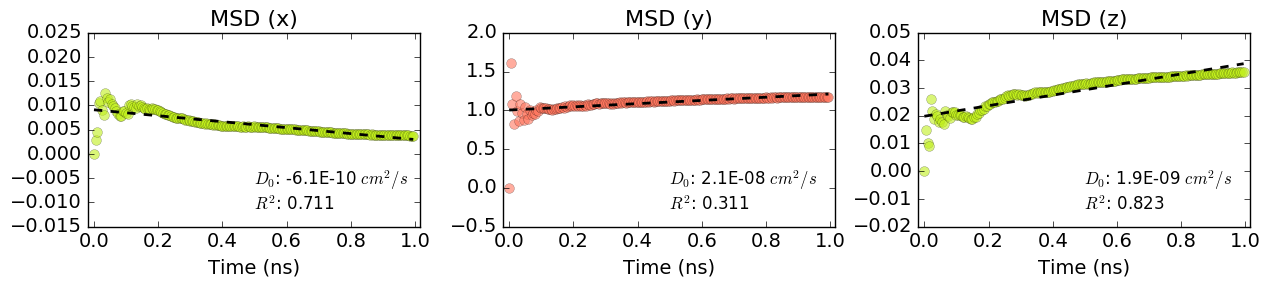

In [3]:
plot_msd(msd_data)